In [ ]:
!pip install rouge_score
!pip uninstall pyarrow -y
!pip uninstall datasets -y
!pip install pyarrow==10.0.1 datasets==2.4.0
!pip install py7zr
!pip install transformers nltk
!pip install datasets transformers
!pip install wandb
!pip install accelerate -U
!pip install transformers[torch]

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=99f0f8eaaf3cc262d481c0c6d53e60ba75f576983245768c00448c58b1472985
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score
Found existing installation: pyarrow 14.0.2
Uninstalling pyarrow-14.0.2:
  Successfully uninstalled pyarrow-14.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could 

In [ ]:
!git clone https://github.com/ryanzhumich/AESLC

Cloning into 'AESLC'...
remote: Enumerating objects: 17469, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 17469 (delta 1), reused 0 (delta 0), pack-reused 17461
Receiving objects: 100% (17469/17469), 7.36 MiB | 17.65 MiB/s, done.
Resolving deltas: 100% (48/48), done.


In [ ]:
import os
import pandas as pd

In [ ]:
def load_data_from_directory(directory):
    data = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".subject"):
                file_path = os.path.join(root, file)
                with open(file_path, 'r', encoding='utf-8') as f:
                    subject = f.readline().strip()
                    email_body = f.read().strip()
                    data.append({'subject_line': subject, 'email_body': email_body})
    return pd.DataFrame(data)

train_data = load_data_from_directory('/content/AESLC/enron_subject_line/train')
dev_data = load_data_from_directory('/content/AESLC/enron_subject_line/dev')
test_data = load_data_from_directory('/content/AESLC/enron_subject_line/test')

In [ ]:
train_data.head()

,subject_line,email_body
0,Sam: We need to send Sharen Cason the Deemed ...,It is a domestic deal and I'd like to review y...
1,"Patrick, The attached file contains the base...",Let me know if you have any questions.\nD\n\n@...
2,FYI: One of our legal consultants has mentione...,They are using an outfit called Intuitive Pro...
3,"Marc, Here's a draft reply to your latest e-m...","What do you think?\nMarc, We have sought, and..."
4,"Richard, I would like to inform you that we ...",Thanks for your interest in having Enron invo...


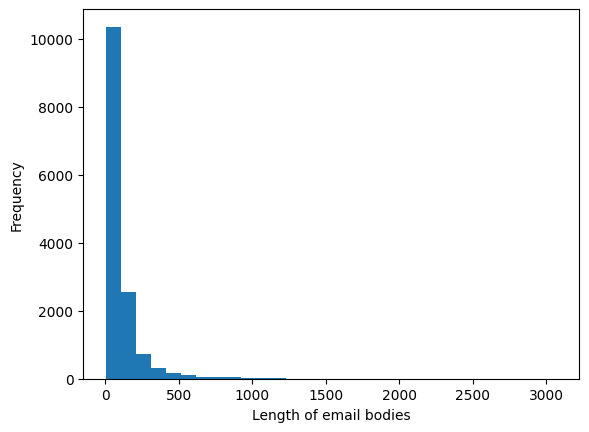

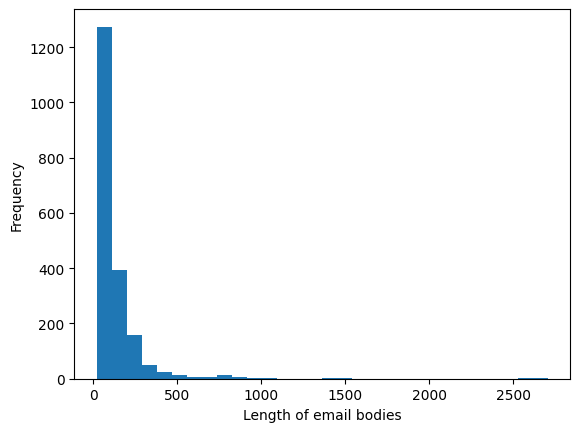

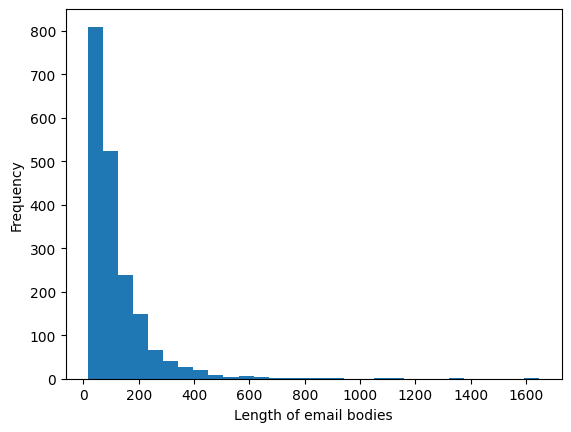

In [ ]:
import matplotlib.pyplot as plt

def plot_data(data):
    lengths = [len(text.split()) for text in data['email_body']]
    plt.hist(lengths, bins=30)
    plt.xlabel('Length of email bodies')
    plt.ylabel('Frequency')
    plt.show()

plot_data(train_data)
plot_data(dev_data)
plot_data(test_data)

In [ ]:
from datasets import Dataset, DatasetDict

In [ ]:
train_dataset = Dataset.from_pandas(train_data)
dev_dataset = Dataset.from_pandas(dev_data)
test_dataset = Dataset.from_pandas(test_data)

dataset_dict = DatasetDict({
    'train': train_dataset,
    'dev': dev_dataset,
    'test': test_dataset
})

In [ ]:
print("\n", dev_data["email_body"].iloc[1])


 My aim is to produce a full preliminary DPR next Monday for this Friday's trading activity.
Please call me if you have any questions or comments.
Shona Wilson Director, Global Risk Operations X39123

@subject
status update on the DPR

@ann0
dpr issuance postponed

@ann1
issuing the dpr postponed

@ann2
postponed issuing dpr


In [ ]:
print("\n", dev_data["subject_line"].iloc[1])


 We have postponed issuing the DPR until the terminations that have already been entered into are appropriately reflected in the risk books.


In [ ]:
from transformers import pipeline
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

In [ ]:
#tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-cnn")

In [ ]:
#model = AutoModelForSeq2SeqLM.from_pretrained("facebook/bart-large-cnn")

In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration, Trainer, TrainingArguments
from datasets import Dataset

In [ ]:
tokenizer = BartTokenizer.from_pretrained('facebook/bart-base')
model = BartForConditionalGeneration.from_pretrained('facebook/bart-base')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

In [ ]:
import torch

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BartForConditionalGeneration(
  (model): BartModel(
    (shared): Embedding(50265, 768, padding_idx=1)
    (encoder): BartEncoder(
      (embed_tokens): BartScaledWordEmbedding(50265, 768, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 768)
      (layers): ModuleList(
        (0-5): 6 x BartEncoderLayer(
          (self_attn): BartSdpaAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=True)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
          (final_layer_norm): Laye

In [ ]:
def get_feature(batch):
  encodings = tokenizer(batch['email_body'], text_target =batch['subject_line'], max_length=1024, truncation=True)

  encodings = {'input_ids' : encodings['input_ids'],
               'attention_mask' : encodings['attention_mask'],
               'labels' : encodings['labels']}

  return encodings

In [ ]:
dataset_features = dataset_dict.map(get_feature, batched=True)

  0%|          | 0/15 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [ ]:
columns = ['input_ids', 'labels', 'attention_mask']
dataset_features.set_format(type='torch', columns=columns)

In [ ]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [ ]:
split_data_set = dataset_features['train'].train_test_split(test_size=0.2)

In [ ]:
dataset_dict['train'] = split_data_set['train']
dataset_dict['eval'] = split_data_set['test']

In [ ]:
train_data.head()

,subject_line,email_body
0,Sam: We need to send Sharen Cason the Deemed ...,It is a domestic deal and I'd like to review y...
1,"Patrick, The attached file contains the base...",Let me know if you have any questions.\nD\n\n@...
2,FYI: One of our legal consultants has mentione...,They are using an outfit called Intuitive Pro...
3,"Marc, Here's a draft reply to your latest e-m...","What do you think?\nMarc, We have sought, and..."
4,"Richard, I would like to inform you that we ...",Thanks for your interest in having Enron invo...


In [ ]:
train_dataset

Dataset({
    features: ['subject_line', 'email_body'],
    num_rows: 14436
})

In [ ]:
def preprocess_data(data_set_val):
    inputs = ["generate subject line: " + email for email in data_set_val['email_body']]
    model_inputs = tokenizer(inputs, max_length=512, truncation=True, padding="max_length")

    with tokenizer.as_target_tokenizer():
        labels = tokenizer(data_set_val['subject_line'], max_length=128, truncation=True, padding="max_length")

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [ ]:
train_dataset = train_dataset.map(preprocess_data, batched=True)
test_dataset = test_dataset.map(preprocess_data, batched=True)

  0%|          | 0/15 [00:00<?, ?ba/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:4016: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


  0%|          | 0/2 [00:00<?, ?ba/s]

In [ ]:
# Define training arguments
# training_args = TrainingArguments(
#     output_dir='./results',
#     evaluation_strategy='epoch',
#     learning_rate=2e-5,
#     per_device_train_batch_size=4,
#     per_device_eval_batch_size=4,
#     num_train_epochs=3,
#     weight_decay=0.01,
#     logging_dir='./logs',
#     report_to='none'
# )

training_args = TrainingArguments(
    output_dir='./results',
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    logging_dir='./logs',
    logging_steps=500,
    evaluation_strategy="epoch",
    report_to='none'
)

# Define Trainer
model_trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train the model
model_trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.655000,0.567846
2,0.540200,0.549123
3,0.477400,0.549826


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file

TrainOutput(global_step=10827, training_loss=0.6030026368292413, metrics={'train_runtime': 4878.8316, 'train_samples_per_second': 8.877, 'train_steps_per_second': 2.219, 'total_flos': 1.320323326672896e+16, 'train_loss': 0.6030026368292413, 'epoch': 3.0})

In [ ]:
evaluation_results = model_trainer.evaluate()
print(f"Evaluation results: {evaluation_results}")

Evaluation results: {'eval_loss': 0.5498263239860535, 'eval_runtime': 48.8206, 'eval_samples_per_second': 39.041, 'eval_steps_per_second': 9.77, 'epoch': 3.0}


In [ ]:
sample_email = """
All: Attached you will find a list that reflects your seat assignments for Business Continuity Planning (BCP).
These seats are located on the 30th and 31st Floors of Enron Center North (ECN).
As previously communicated, you will report to these designated seats in the event of an outage in ECS.
The exception to this is as follows: If your seat assignment is located on the 31st Floor, you will report to your original location that you occupied prior to your move into ECS.
This will hold true until the Monday after Thanksgiving, as we will have the 31st floor seats set up at that time.
Testing: Once you have moved to ECS, if you would like to test your BCP location, you will be able to test your seat for functionality every Thursday from 3-6pm.
Testing is not required, but is highly recommended.
If anyone has any questions or concerns about these procedures, please feel free to contact me at any time.
Regards,

@subject
BCP Seat Assignments

@ann0
your seat assignments for business continuity planning (bcp).

@ann1
bcp seat assignments

@ann2
here are your seat assignments for the business continuity planning event
"""
inputs = tokenizer(sample_email, return_tensors="pt").input_ids.to(device)
outputs = model.generate(inputs, max_length=10, num_beams=2, repetition_penalty=2.5, length_penalty=1.0, early_stopping=True)
print("Generated Subject Line:", tokenizer.decode(outputs[0], skip_special_tokens=True))

Generated Subject Line: All:  As you are aware


In [ ]:
sample_email = "Hi team, the project deadline has been extended to next Friday. Please ensure all deliverables are completed by then. Thanks."
inputs = tokenizer(sample_email, return_tensors="pt").input_ids.to(device)
outputs = model.generate(inputs, max_length=10, num_beams=2, repetition_penalty=2.5, length_penalty=1.0, early_stopping=True)
print("Generated Subject Line:", tokenizer.decode(outputs[0], skip_special_tokens=True))

Generated Subject Line: Hi team,  Thanks for your


In [ ]:
sample_email = "Michelle;  This is the presentation which was provided to the HR VP's.The HR VPs were tasked with going off to met their BU OTCs and devise plans around the three components.We are currently collating those plans into one document.We'll send that along to you when completed.Pls call if you have any questions."
inputs = tokenizer(sample_email, return_tensors="pt").input_ids.to(device)
outputs = model.generate(inputs, max_length=10, num_beams=2, repetition_penalty=2.5, length_penalty=1.0, early_stopping=True)
print("Generated Subject Line:", tokenizer.decode(outputs[0], skip_special_tokens=True))

Generated Subject Line: Attached is the presentation which was


In [ ]:
sample_email = "To confirm:  Mark Thomas Mike Presley  both previously on the list for Netco's Market Risk/Research Group have resigned.I'm combing the Estate for replacements.DP"
inputs = tokenizer(sample_email, return_tensors="pt").input_ids.to(device)
outputs = model.generate(inputs, max_length=10, num_beams=2, repetition_penalty=2.5, length_penalty=1.0, early_stopping=True)
print("Generated Subject Line:", tokenizer.decode(outputs[0], skip_special_tokens=True))

Generated Subject Line: Attached is a list of Directors


In [ ]:
# Save the model locally
model_save_path = "./email_subuject_bart_base"
model.save_pretrained(model_save_path)
tokenizer.save_pretrained(model_save_path)

print(f"Model and tokenizer saved to {model_save_path}")

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


Model and tokenizer saved to ./email_subuject_bart_base


In [ ]:
# Generate subject lines for the test set
def generate_subject_line(email_body):
    inputs = tokenizer("generate subject line: " + email_body, return_tensors="pt", max_length=512, truncation=True)
    # Move inputs to the GPU if available
    inputs = {k: v.to(model.device) for k, v in inputs.items()}
    # Access input_ids from the dictionary
    outputs = model.generate(inputs['input_ids'], max_length=128, num_beams=4, early_stopping=True)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

test_data['generated_subject_line'] = test_data['email_body'].apply(generate_subject_line)

In [ ]:
test_data.head()

,subject_line,email_body,generated_subject_line
0,"Dan, Have just been in a meeting with our tec...",We are sorry to say that the vessel need abt 4...,"Hi guys, We are in the process of finalizing ..."
1,This is the speadsheet we have been working of...,Please let me know if you have questions or wo...,Attached is a spreadsheet for your review.
2,Dear Sir's.,Confirm ETA Qalhat 13th.\nMay 0900 local time....,Please confirm the following: Vessel: Inmarsa...
3,"Please be informed, I will be out on vacation ...","I will be available for you, however, just cal...",I will be out of the office on vacation this m...
4,"I hate to do this, and do not want to put anyo...",The mosquitoes are terrible.\nIt is hurting me...,I just wanted to say that I am so sorry for al...
